# **Data Analyst project 1 (python project):**

In this project, I am going to conduct data analysis on Walmart commerce data. The focus of the project is to collect and clean the data using the Python Pandas library. 

After that, I will perform data visualization using Matplotlib library in Python, followed by the conclusion of the analysis.

The data source is Kaggle.com.


# Importing Libraray

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

# Getting Data

In [2]:
df = pd.read_csv("/kaggle/input/walmart-commerce-data/WalmartSQL repository..csv",sep=';', quoting=2, index_col=0)

# Display Data

In [3]:
df.head()

,branch,city,customer_type,gender,product_line,unit_price,quantity,vat,total,dtme,tme,payment_method,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name
invoice_id,,,,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,2019-01-05 00:00:00,13:08:00,Ewallet,522.83,4.7619,26.1415,9.1,afternoon,Saturday,January
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,2019-03-08 00:00:00,10:29:00,Cash,76.40,4.7619,3.8200,9.6,morning,Friday,March
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,2019-03-03 00:00:00,13:23:00,Credit card,324.31,4.7619,16.2155,7.4,afternoon,Sunday,March
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,2019-01-27 00:00:00,20:33:00,Ewallet,465.76,4.7619,23.2880,8.4,evening,Sunday,January
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2019-02-08 00:00:00,10:37:00,Ewallet,604.17,4.7619,30.2085,5.3,morning,Friday,February


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   branch            1000 non-null   object 
 1   city              1000 non-null   object 
 2   customer_type     1000 non-null   object 
 3   gender            1000 non-null   object 
 4   product_line      1000 non-null   object 
 5   unit_price        1000 non-null   float64
 6   quantity          1000 non-null   float64
 7   vat               1000 non-null   float64
 8   total             1000 non-null   float64
 9   dtme              1000 non-null   object 
 10  tme               1000 non-null   object 
 11  payment_method    1000 non-null   object 
 12  cogs              1000 non-null   float64
 13  gross_margin_pct  1000 non-null   float64
 14  gross_income      1000 non-null   float64
 15  rating            1000 non-null   float64
 16  time_of_day       1000 non-nul

In [5]:
df.shape

(1000, 19)

# Data Statistics

In [6]:
df.describe()

,unit_price,quantity,vat,total,cogs,gross_margin_pct,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.0000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.7619,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.0000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.7619,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.7619,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.7619,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.7619,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.7619,49.650000,10.00000


In [7]:
df.isnull().sum()

branch              0
city                0
customer_type       0
gender              0
product_line        0
unit_price          0
quantity            0
vat                 0
total               0
dtme                0
tme                 0
payment_method      0
cogs                0
gross_margin_pct    0
gross_income        0
rating              0
time_of_day         0
day_name            0
month_name          0
dtype: int64

In [8]:
print(f"data set contains {df.shape[0]} rows and {df.shape[1]} colums")

data set contains 1000 rows and 19 colums


# Analysis:

**Analysing each branch and city sales:**

In [9]:
df_maxSaleCity = df.groupby('city').gross_income.sum()
df_maxSaleCity

city
Mandalay     5057.0320
Naypyitaw    5265.1765
Yangon       5057.1605
Name: gross_income, dtype: float64

In [10]:
df_maxSaleBranch = df.groupby(['city','branch']).gross_income.sum()
df_maxSaleBranch

city       branch
Mandalay   B         5057.0320
Naypyitaw  C         5265.1765
Yangon     A         5057.1605
Name: gross_income, dtype: float64

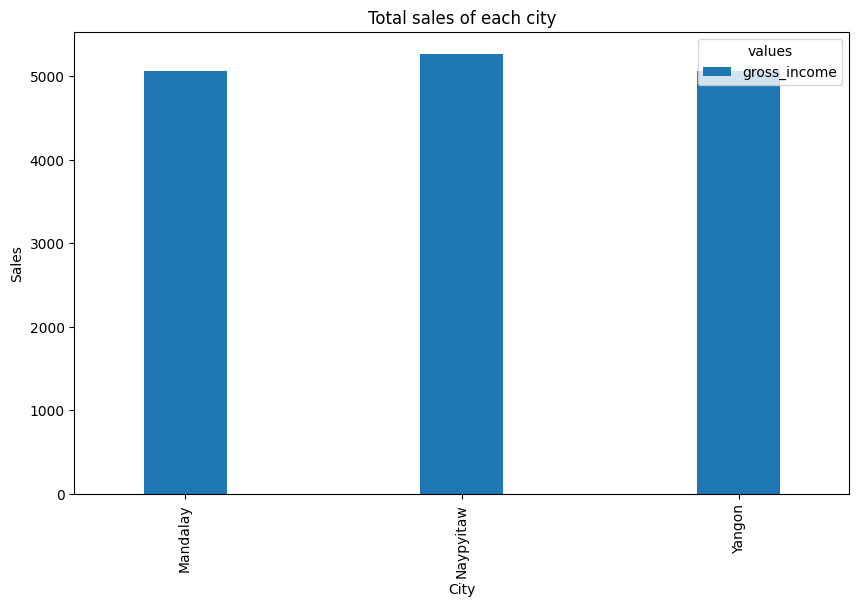

In [11]:
ax_1 = df_maxSaleCity.plot(kind='bar', width=0.3, figsize=(10,6))
plot.xlabel('City')
plot.ylabel('Sales')
plot.title('Total sales of each city')
plot.legend(title='values')
plot.show()

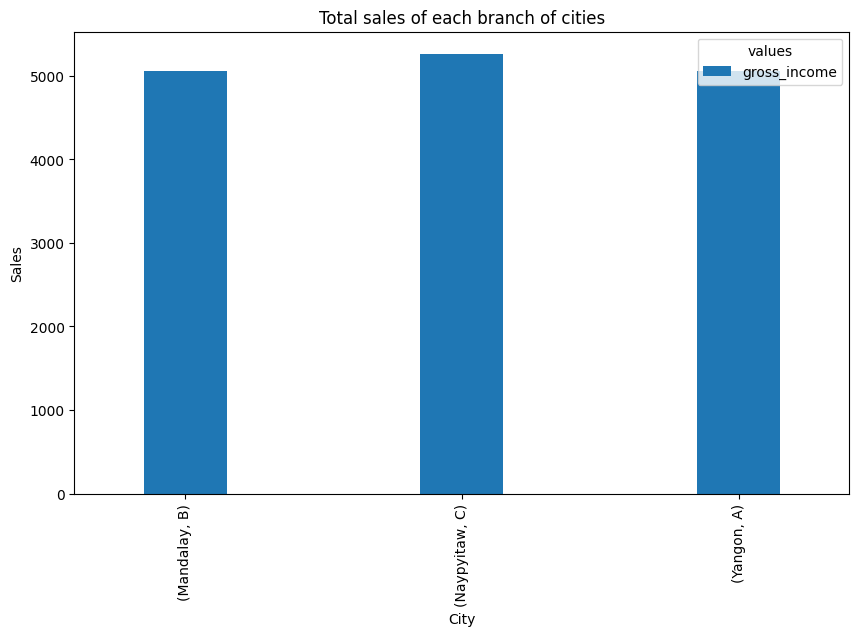

In [12]:
ax_2= df_maxSaleBranch.plot(kind='bar', width=0.3, figsize=(10,6))
plot.xlabel('City')
plot.ylabel('Sales')
plot.title('Total sales of each branch of cities')
plot.legend(title='values')
plot.show()

With this, I conclude that Branch C of Naypyitaw made the maximum sales, and also that the city has the highest sales.

**Analysis of customers:**

In [13]:
cutomer_type = df.customer_type.value_counts()
cutomer_type

customer_type
Member    501
Normal    499
Name: count, dtype: int64

In [14]:
cutomer_gender = df.gender.value_counts()
cutomer_gender

gender
Female    501
Male      499
Name: count, dtype: int64

In [15]:
member_gender = df.loc[df.customer_type == 'Member'].gender.value_counts()
member_gender

gender
Female    261
Male      240
Name: count, dtype: int64

In [16]:
Normal_gender = df.loc[df.customer_type == 'Normal'].gender.value_counts()
Normal_gender

gender
Male      259
Female    240
Name: count, dtype: int64

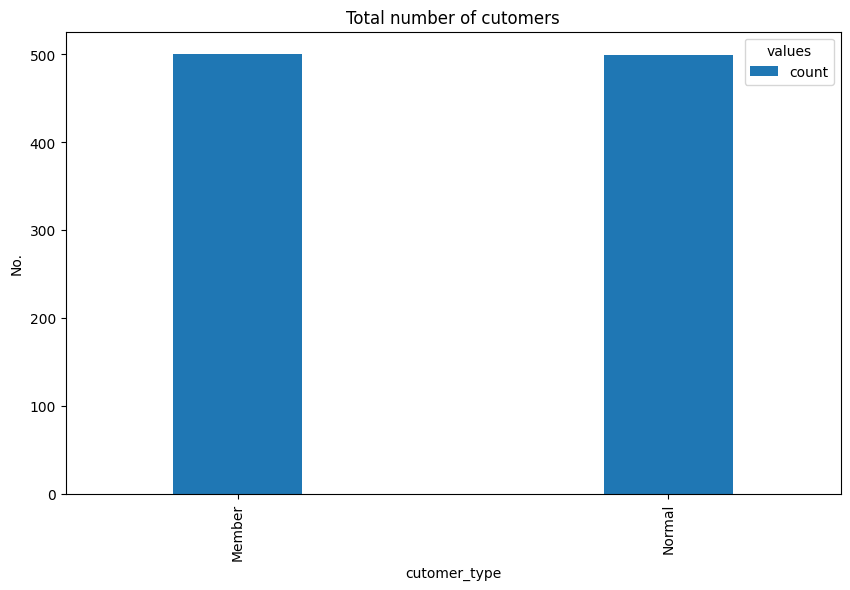

In [17]:
ax_3= cutomer_type.plot(kind='bar', width=0.3, figsize=(10,6))
plot.xlabel('cutomer_type')
plot.ylabel('No.')
plot.title('Total number of cutomers')
plot.legend(title='values')
plot.show()

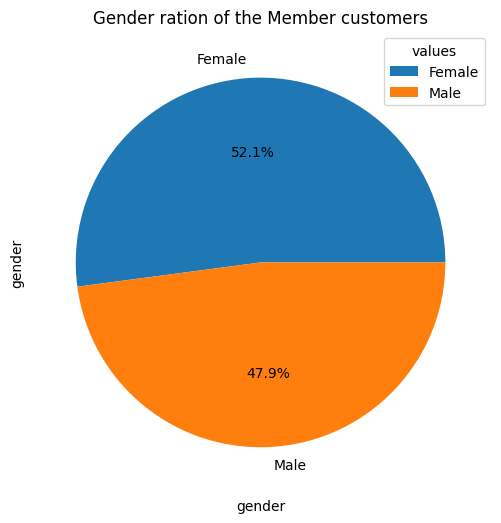

In [18]:
ax_4= member_gender.plot(kind='pie', autopct='%1.1f%%',figsize=(10,6))
plot.xlabel('gender')
plot.ylabel('gender')
plot.title('Gender ration of the Member customers')
plot.legend(title='values')
plot.show()

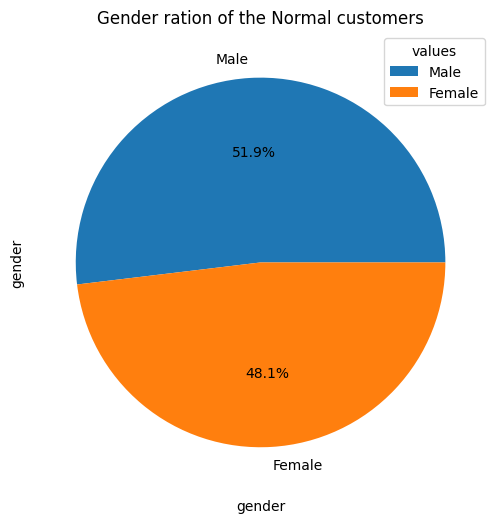

In [19]:
ax_5= Normal_gender.plot(kind='pie',autopct='%1.1f%%', figsize=(10,6))
plot.xlabel('gender')
plot.ylabel('gender')
plot.title('Gender ration of the Normal customers')
plot.legend(title='values')
plot.show()

From the analysis, I conclude that customers who are members and those who are not members are almost equal. However, there are more female customers who are members than male customers. Additionally, customers who are not members of the shop are predominantly male rather than female.

**Analysis of product:**

In [20]:
product = df.product_line.value_counts()
product

product_line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [21]:
product_sale = df.groupby('product_line').quantity.sum()
product_sale

product_line
Electronic accessories    971.0
Fashion accessories       902.0
Food and beverages        952.0
Health and beauty         854.0
Home and lifestyle        911.0
Sports and travel         920.0
Name: quantity, dtype: float64

In [22]:
product_totalSale = df.groupby('product_line').total.agg([sum,max, min])
product_totalSale 

/tmp/ipykernel_18/1177631359.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  product_totalSale = df.groupby('product_line').total.agg([sum,max, min])
/tmp/ipykernel_18/1177631359.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  product_totalSale = df.groupby('product_line').total.agg([sum,max, min])
/tmp/ipykernel_18/1177631359.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  product_totalSale = df.groupby('product_line').tot

,sum,max,min
product_line,,,
Electronic accessories,54337.5315,942.4485,26.7225
Fashion accessories,54305.8950,1042.6500,12.6945
Food and beverages,56144.8440,1034.4600,22.6590
Health and beauty,49193.7390,950.2500,18.6375
Home and lifestyle,53861.9130,1023.7500,14.6790
Sports and travel,55122.8265,1002.1200,10.6785


In [23]:
product_rating = df.groupby('product_line').rating.mean()
product_rating 

product_line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: rating, dtype: float64

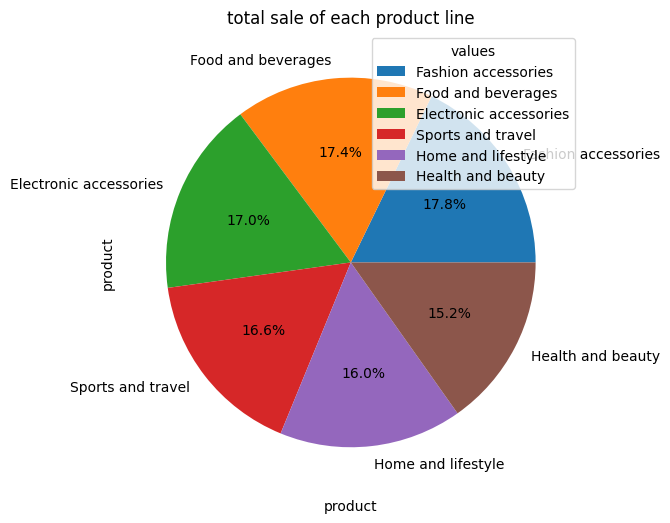

In [24]:
ax_6= product.plot(kind='pie', autopct='%1.1f%%',figsize=(10,6))
plot.xlabel('product')
plot.ylabel('product')
plot.title('total sale of each product line')
plot.legend(title='values')
plot.show()

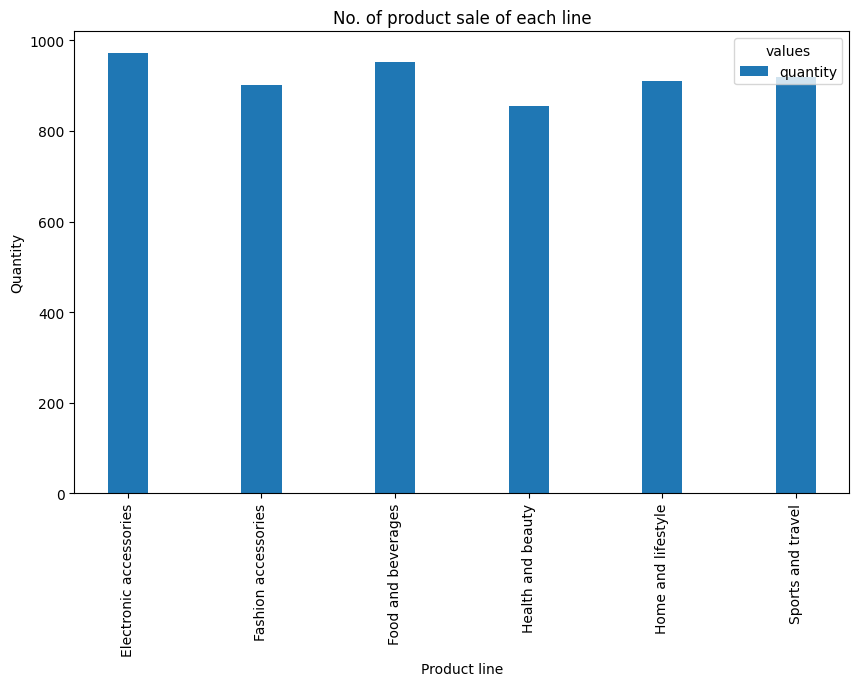

In [25]:
ax_7= product_sale.plot(kind='bar', width=0.3,figsize=(10,6))
plot.xlabel('Product line')
plot.ylabel('Quantity')
plot.title('No. of product sale of each line')
plot.legend(title='values')
plot.show()

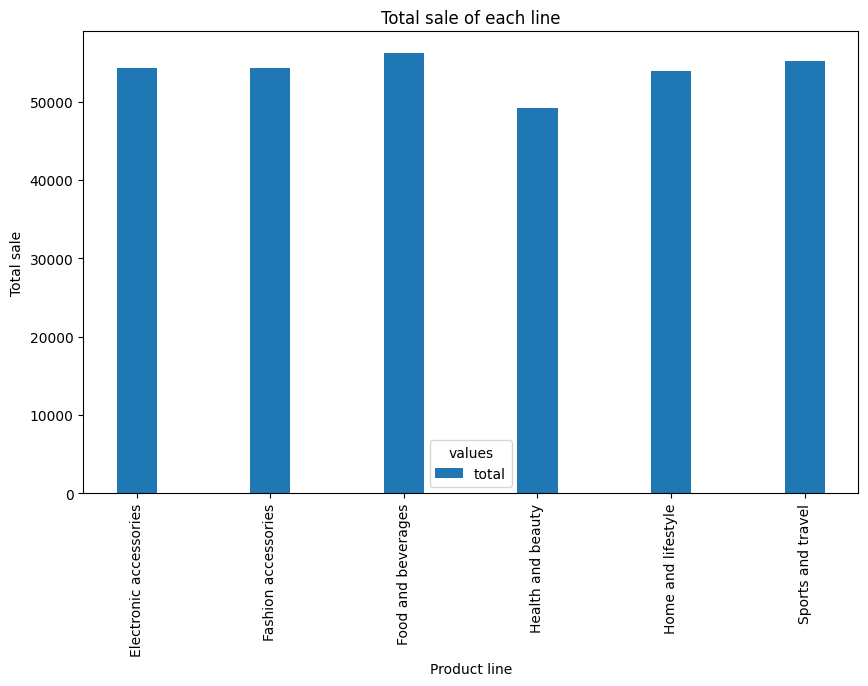

In [26]:
data = df.groupby('product_line').total.sum()
ax_8= data.plot(kind='bar', width=0.3,figsize=(10,6))
plot.xlabel('Product line')
plot.ylabel('Total sale')
plot.title('Total sale of each line')
plot.legend(title='values')
plot.show()

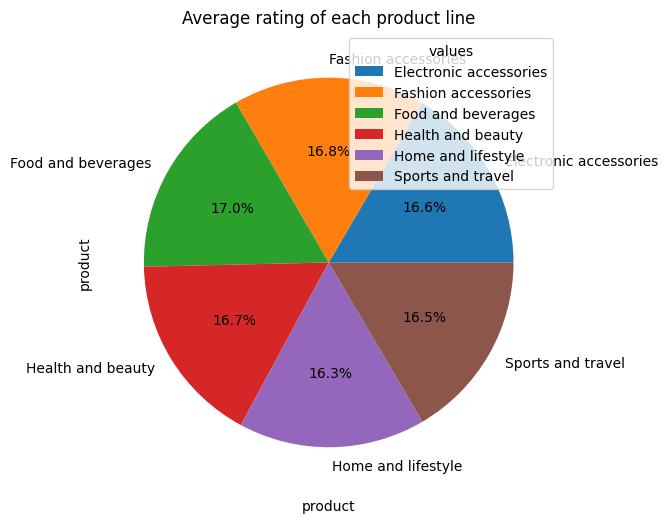

In [27]:
ax_6= product_rating.plot(kind='pie', autopct='%1.1f%%',figsize=(10,6))
plot.xlabel('product')
plot.ylabel('product')
plot.title('Average rating of each product line')
plot.legend(title='values')
plot.show()

From the analysis, I conclude that the product lines of Fashion Accessories, Food and Beverages, and Electronic Accessories performed well in sales, while other lines showed slightly lower performance. Notably, Electronic Accessories emerged as the top-selling product line. In comparison, the Health and Beauty product line recorded lower sales than the remaining product lines. Food and Beverages attained the highest average rating, whereas other product lines demonstrated similar rating averages

**Analysis of sale time, day and month:**

In [28]:
sale_time = df.time_of_day.value_counts()
sale_time 

time_of_day
evening      432
afternoon    377
morning      191
Name: count, dtype: int64

In [29]:
sale_day = df.day_name.value_counts()
sale_day

day_name
Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: count, dtype: int64

In [30]:
sale_month = df.month_name.value_counts()
sale_month

month_name
January     352
March       345
February    303
Name: count, dtype: int64

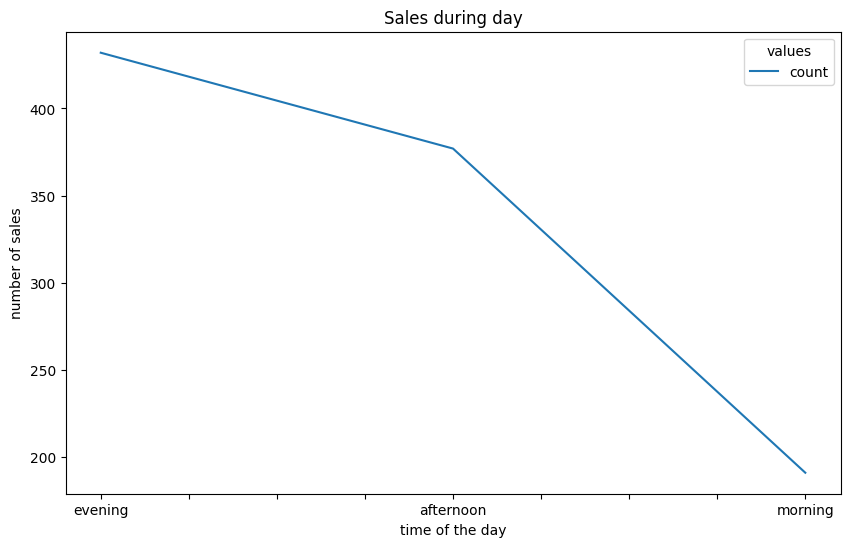

In [31]:
ax_6= sale_time.plot(kind='line',figsize=(10,6))
plot.xlabel('time of the day')
plot.ylabel('number of sales')
plot.title('Sales during day')
plot.legend(title='values')
plot.show()

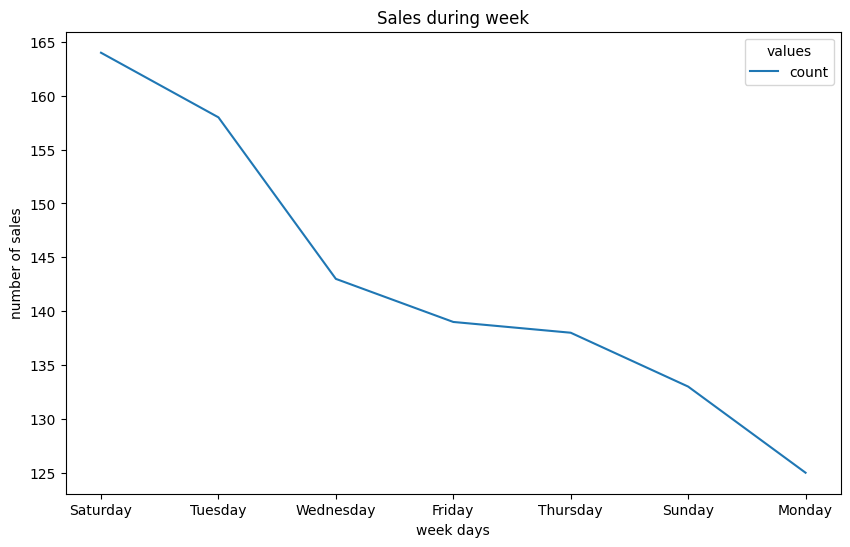

In [32]:
ax_6= sale_day.plot(kind='line',figsize=(10,6))
plot.xlabel('week days')
plot.ylabel('number of sales')
plot.title('Sales during week')
plot.legend(title='values')
plot.show()

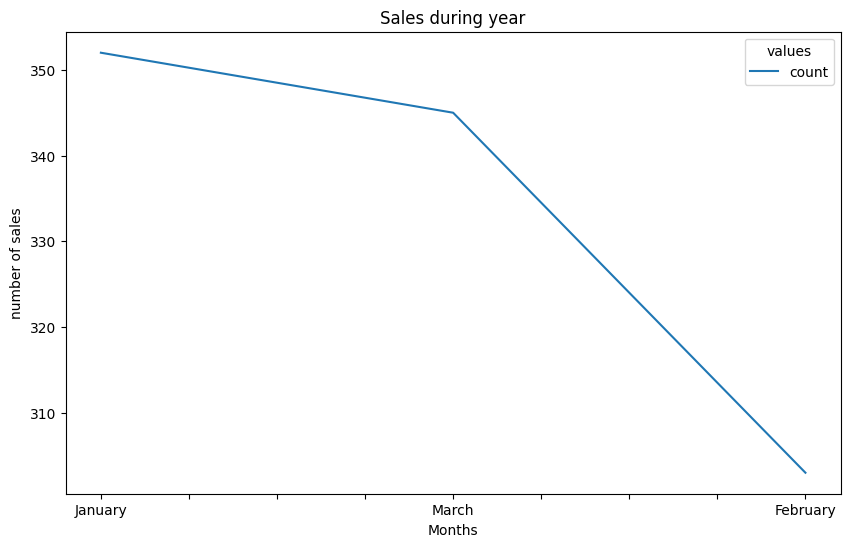

In [33]:
ax_6= sale_month.plot(kind='line',figsize=(10,6))
plot.xlabel('Months')
plot.ylabel('number of sales')
plot.title('Sales during year')
plot.legend(title='values')
plot.show()

From the analysis, I conclude that the peak time for sales in the shops is during the evening. The highest sales occur on Saturday, Tuesday, and Wednesday. Lastly, the shops experienced maximum sales in the month of January.